In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***`LIBRARIES`***

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
!pip install category_encoders
!pip install joblib
!pip install scipy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import recall_score, classification_report, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize


# ***`READ DATA`***

In [ ]:
excel_file_path = "/content/drive/My Drive/Colab Notebooks/NCKH (Mr. Hiếu)/CleanedData.xlsx"
df = pd.read_excel(excel_file_path)

In [ ]:
column_to_analyze = ["Gender", "YearOfLearning", "UniversityName",
    "GroupMajor", "Major", "GradeRank", "UseGPT?", "GradeTrend(GPT)",
    "FrequencyUse(GPT)", "UsageBeyondAcademics", "TimeUsage(1day)",
                     "DifferentWebsites", "Priority", "Reliability", "ResultofGPT",
    "InfluenceofGPT", "SatisfactionLevel", "Relevance", "Inspire&Motivate",
    "PositiveInfluence", "NegativeInfluence", "Effective", "ReplaceTeacher",
    "SpeechDoExam", "Dependence&Constraint", "LazyStudy&Think", "ImproveStudy",
    "SatisfiedResult", "MechanismOfAction", "EasyToUnderstand", "CompareGoogle",
    "FindJob", "WaytoAsk"]
df_copy = df[column_to_analyze]
df_copy.keys()

Index(['Gender', 'YearOfLearning', 'UniversityName', 'GroupMajor', 'Major',
       'GradeRank', 'UseGPT?', 'GradeTrend(GPT)', 'FrequencyUse(GPT)',
       'UsageBeyondAcademics', 'TimeUsage(1day)', 'DifferentWebsites',
       'Priority', 'Reliability', 'ResultofGPT', 'InfluenceofGPT',
       'SatisfactionLevel', 'Relevance', 'Inspire&Motivate',
       'PositiveInfluence', 'NegativeInfluence', 'Effective', 'ReplaceTeacher',
       'SpeechDoExam', 'Dependence&Constraint', 'LazyStudy&Think',
       'ImproveStudy', 'SatisfiedResult', 'MechanismOfAction',
       'EasyToUnderstand', 'CompareGoogle', 'FindJob', 'WaytoAsk'],
      dtype='object')

# ***`Missing Values`***

In [ ]:
null_values = df_copy.isnull().sum()
null_values

,0
Gender,0
YearOfLearning,0
UniversityName,0
GroupMajor,0
Major,0
GradeRank,0
UseGPT?,0
GradeTrend(GPT),0
FrequencyUse(GPT),0
UsageBeyondAcademics,0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 857 non-null    object
 1   YearOfLearning         857 non-null    int64 
 2   UniversityName         857 non-null    object
 3   GroupMajor             857 non-null    object
 4   Major                  857 non-null    object
 5   GradeRank              857 non-null    int64 
 6   UseGPT?                857 non-null    int64 
 7   GradeTrend(GPT)        857 non-null    int64 
 8   FrequencyUse(GPT)      857 non-null    int64 
 9   UsageBeyondAcademics   857 non-null    int64 
 10  TimeUsage(1day)        857 non-null    int64 
 11  DifferentWebsites      857 non-null    object
 12  Priority               857 non-null    int64 
 13  Reliability            857 non-null    int64 
 14  ResultofGPT            857 non-null    int64 
 15  InfluenceofGPT         

# **`Encoding`**

In [ ]:
df_copy.head(2)

,Gender,YearOfLearning,UniversityName,GroupMajor,Major,GradeRank,UseGPT?,GradeTrend(GPT),FrequencyUse(GPT),UsageBeyondAcademics,...,SpeechDoExam,Dependence&Constraint,LazyStudy&Think,ImproveStudy,SatisfiedResult,MechanismOfAction,EasyToUnderstand,CompareGoogle,FindJob,WaytoAsk
0,Nữ,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,5,1,3,5,5,...,1,3,3,3,3,3,3,Google,3,3
1,Nam,4,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,5,1,3,4,5,...,1,4,5,5,4,5,4,ChatGPT,4,5


In [ ]:
encoder_features = ['Gender', 'UniversityName', 'GroupMajor', 'Major', 'DifferentWebsites', 'CompareGoogle']

for feature in encoder_features:
    label_encoding = LabelEncoder()
    df_copy[feature] = label_encoding.fit_transform(df_copy[feature])

# ***`Check Unballance Target features`***

In [ ]:
pd.crosstab(df_copy['UseGPT?'],df_copy['UseGPT?'], normalize='all')*100

UseGPT?,0,1
UseGPT?,,
0,28.121354,0.000000
1,0.000000,71.878646


In [ ]:
# Shuffle toàn bộ DataFrame
df_copy = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
X = df_copy.drop(columns = ['UseGPT?'])
y = df_copy['UseGPT?']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# ***`Train/Test Split`***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
train_class_counts = pd.Series(y_train).value_counts()

# Đếm số lượng các lớp trong y_test
test_class_counts = pd.Series(y_test).value_counts()

# In kết quả
print("Train Class Counts:")
print(train_class_counts)

print("\nTest Class Counts:")
print(test_class_counts)

Train Class Counts:
UseGPT?
0    436
1    426
Name: count, dtype: int64

Test Class Counts:
UseGPT?
1    190
0    180
Name: count, dtype: int64


# ***`Normalization`***

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [ ]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.5,0.00,0.729730,0.5,0.355372,0.833333,1.0,0.00,0.00,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.666667,0.00,0.00
1,1.0,0.50,0.405405,0.9,0.636364,0.833333,0.5,0.25,0.50,0.000000,...,0.000000,0.50,0.50,0.50,0.50,0.25,1.00,0.333333,0.75,0.50
2,0.5,0.50,0.162162,0.5,0.355372,0.666667,1.0,0.25,0.75,0.000000,...,0.666667,0.25,1.00,0.75,0.25,0.25,0.75,1.000000,0.75,0.25
3,1.0,0.75,0.432432,0.9,0.636364,0.666667,1.0,1.00,1.00,0.333333,...,0.666667,0.75,0.75,0.75,0.75,0.75,0.50,1.000000,1.00,0.75
4,0.5,0.25,0.351351,0.3,0.446281,0.166667,0.5,0.00,0.00,0.000000,...,0.333333,0.50,0.50,0.50,0.50,0.50,0.50,0.666667,0.50,0.50


In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


# ***`Random Forest`***

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
expected = y_test
predicted = RF_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_RF= metrics.confusion_matrix(expected, predicted)
print(cm_RF)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       180
           1       0.92      0.88      0.90       190

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370

[[165  15]
 [ 22 168]]


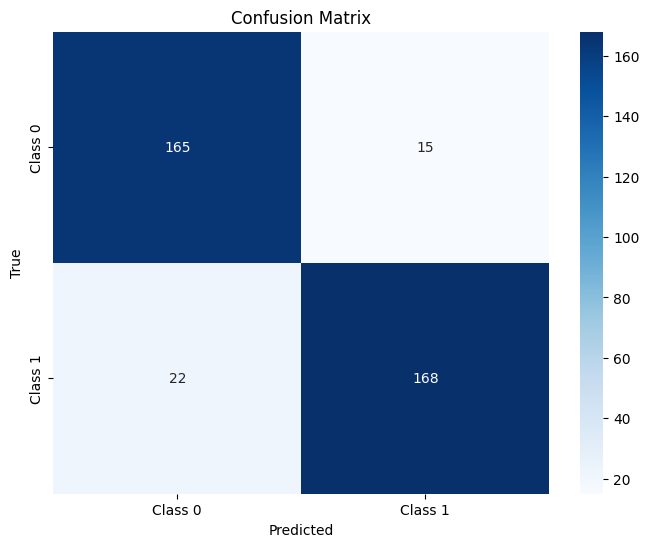

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.950


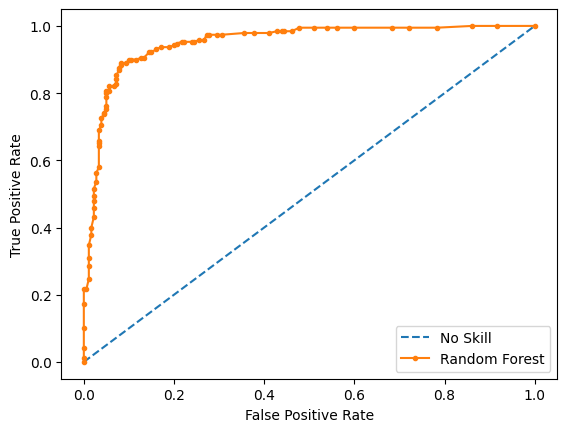

In [ ]:
# generate a no skill (ns) prediction and random forest (rf) predictions.
ns_probs = [0 for i in range(len(y_test))]
rf_probs = RF_classifier.predict_proba(X_test_scaled)[:,1]
# calculating scores for no skill and random forest
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ***`Grid Search RF `***

Sau khi tuning sử dụng ballance sampling thì cũng thế so với khi chưa tuning

In [ ]:

param_grid = {
    'n_estimators': [10,25,30,50,100,200],
    'max_depth': [2,3,5,10,20],
    'criterion':['entropy','gini'],
    'min_samples_leaf': [5,10,20,50,100,200],
    'min_samples_split': [2, 5, 10],
}

# Tạo đối tượng GridSearchCV
grid_search_RF = GridSearchCV(estimator=RF_classifier,
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv = 5,
                           verbose=1,
                           scoring="accuracy")

grid_search_RF.fit(X_train_scaled, y_train)
grid_search_RF.best_estimator_


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=50)

In [ ]:
expected = y_test
predicted = grid_search_RF.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       180
           1       0.90      0.86      0.88       190

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

[[161  19]
 [ 27 163]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_RF.pkl', 'wb') as file:
    pickle.dump(grid_search_RF, file)

In [ ]:
importances_Grid_Search_RF = grid_search_RF.best_estimator_.feature_importances_
importances_Grid_Search_RF


array([0.01060118, 0.01386009, 0.02301074, 0.02063865, 0.02141831,
       0.02268372, 0.02862262, 0.23260937, 0.07766257, 0.0412307 ,
       0.02364082, 0.1065461 , 0.01337767, 0.01577879, 0.01836645,
       0.03425082, 0.02523918, 0.01350141, 0.01454517, 0.00629254,
       0.01716872, 0.01161752, 0.01632973, 0.0174562 , 0.00757338,
       0.0206982 , 0.00862862, 0.01615793, 0.02009445, 0.02820066,
       0.01233864, 0.05985905])

In [ ]:
FIM_Grid_Search_RF = pd.DataFrame({'Features': X_train_scaled.columns , 'Feature_importance':importances_Grid_Search_RF})
FIM_Grid_Search_RF = FIM_Grid_Search_RF.sort_values(by=['Feature_importance'])
FIM_Grid_Search_RF


,Features,Feature_importance
19,19,0.006293
24,24,0.007573
26,26,0.008629
0,0,0.010601
21,21,0.011618
30,30,0.012339
12,12,0.013378
17,17,0.013501
1,1,0.013860
18,18,0.014545


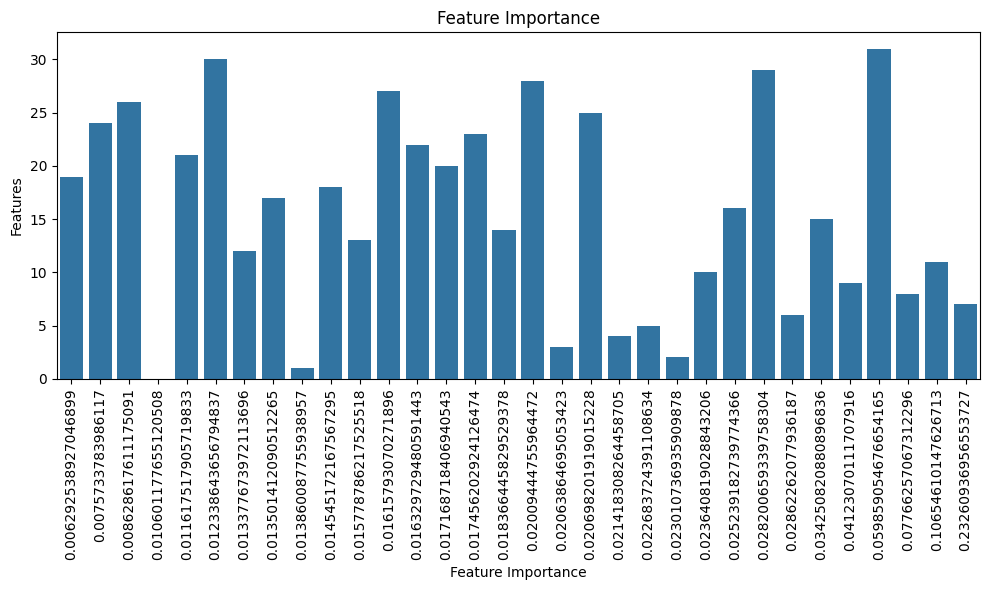

In [ ]:
# Vẽ biểu đồ với tên biến xoay 90 độ
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM_Grid_Search_RF)
plt.xticks(rotation=90)  # Xoay nhãn trục X 90 độ
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()  # Đảm bảo nhãn không bị cắt
plt.show()

--------------------------------------


# ***`Logistic Regression`***

In [ ]:
!pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=92463efcca210f9a7782d1e526f28d635e5b0832ff0ca885d7a67f2c0de65356
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [ ]:
from sklearn.linear_model import LogisticRegression

# Tạo và huấn luyện mô hình Logistic Regression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)

expected = y_test
predicted = LR_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_LR= metrics.confusion_matrix(expected, predicted)
print(cm_LR)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       180
           1       0.87      0.87      0.87       190

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370

[[155  25]
 [ 25 165]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/LR_model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

In [ ]:
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(estimator=LR_model, param_grid=param_grid_LR, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_LR.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_LR.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_LR.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_LR.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 86.78%
Test Accuracy: 86.49%


In [ ]:
expected = y_test
predicted = grid_search_LR.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       180
           1       0.87      0.86      0.87       190

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370

[[156  24]
 [ 26 164]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_LR.pkl', 'wb') as file:
    pickle.dump(grid_search_LR, file)

In [ ]:
# Assume model is your trained Ordinal Logistic Regression model
coefficients = model_LR.coef_[0]
print(coefficients)


NameError: name 'model_LR' is not defined

In [ ]:

feature_names = X_resampled.columns  # Assuming you have named columns in your dataset

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()


In [ ]:

# Get the indices that would sort the feature importances
sorted_indices = np.argsort(np.abs(coefficients))

# Sort the features and importances accordingly
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importance = coefficients[sorted_indices]

# Plot the sorted feature importance
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Logistic Regression Feature Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()



# **`SVM`**

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)


SVC()

In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/svm_classifier.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)

In [ ]:
expected = y_test
predicted = svm_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       180
           1       0.90      0.88      0.89       190

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

[[161  19]
 [ 23 167]]


In [ ]:
param_grid_SVM = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_SVM, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_SVM.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_SVM.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_SVM.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_SVM.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 85.52%
Test Accuracy: 83.72%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
expected = y_test
predicted = grid_search_SVM.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

NameError: name 'grid_search_SVM' is not defined

In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_SVM.pkl', 'wb') as file:
    pickle.dump(grid_search_SVM, file)

# ***`RFE`***


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import numpy as np

rfe = RFE(estimator=svm_classifier, n_features_to_select=10)

X_rfe = rfe.fit_transform(X_train, y_train)

selected_features = np.array(X_train.columns)[rfe.support_]

print("Các đặc trưng quan trọng sau khi sử dụng RFE:")
print(selected_features)


Các đặc trưng quan trọng sau khi sử dụng RFE:
['Cau11' 'Cau12' 'Cau17' 'Cau20' 'Cau23' 'Cau28' 'Cau30' 'Cau33' 'Cau35'
 'Cau36']


# ***`[KNN]`***

In [ ]:
# Define the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:
expected = y_test
predicted = knn_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       180
           1       0.90      0.77      0.83       190

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.85      0.84      0.84       370

[[163  17]
 [ 43 147]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [ ]:
# Set up the parameter grid for the grid search
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the GridSearchCV object
grid_search_KNN = GridSearchCV(estimator=knn_model, param_grid=param_grid_KNN, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_KNN.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_KNN.best_params_)

Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
expected = y_test
predicted = grid_search_KNN.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        53
           1       0.87      0.88      0.87       162

    accuracy                           0.81       215
   macro avg       0.74      0.73      0.74       215
weighted avg       0.81      0.81      0.81       215

[[ 31  22]
 [ 19 143]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_KNN.pkl', 'wb') as file:
    pickle.dump(grid_search_KNN, file)

# ***`XGBoost`***

In [ ]:
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
expected = y_test
predicted = xgb_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       180
           1       0.92      0.87      0.90       190

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370

[[166  14]
 [ 24 166]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [ ]:

# Set up the parameter grid for the grid search
param_grid_sbg = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_sbg, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_xgb.best_params_)


Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
expected = y_test
predicted = grid_search_xgb.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       180
           1       0.92      0.86      0.89       190

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

[[166  14]
 [ 27 163]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_xgb.pkl', 'wb') as file:
    pickle.dump(grid_search_xgb, file)